# Prueba Técnica DS

El proposito de esta prueba técnica es comprobar si el candidato posee conocimientos de Python (básico y aplicados a ML). Desde Python 3, aconsejamos usar las siguientes librerias (salvo que se indique lo contrario): **numpy, pandas, matplotlib**



## Bloque 1: Python general

### 1.1: Escribe una función que te devuelva una matriz de números aleatorios entre 1 y 100 con 2 decimales. El número de filas y columnas de la matriz será determinado por sendos parámetros. Utiliza la función para crear una matriz de 10 filas y 7 columnas.
<font color="#9E1B32">**(No utilices NUMPY ni PANDAS en este apartado 1.1, en los demás puedes usarlo)**</font>


In [15]:
import random
def randomMatrix(nRow, nCol):
    matrix = [[round(random.uniform(1, 100), 2) for c in range(nCol)] for r in range(nRow)]
    return matrix

matrix = randomMatrix(10,7)
print(matrix)

[[66.82, 4.66, 58.14, 22.98, 61.27, 1.25, 12.71], [95.68, 10.8, 25.4, 15.14, 59.4, 25.78, 5.34], [8.79, 55.26, 16.88, 31.51, 97.25, 93.53, 85.42], [26.64, 86.64, 21.05, 57.46, 12.47, 99.27, 55.3], [26.81, 92.62, 22.65, 40.34, 75.21, 16.81, 22.68], [11.29, 51.85, 27.04, 92.06, 87.27, 42.93, 90.33], [43.93, 47.21, 55.09, 96.21, 72.93, 61.9, 59.82], [96.43, 35.9, 75.6, 3.57, 13.37, 84.43, 13.93], [8.18, 33.41, 49.21, 68.89, 18.88, 63.51, 22.8], [53.83, 45.71, 5.45, 49.04, 20.14, 99.1, 4.15]]


### 1.2: Normaliza los elementos de la matriz anterior, de modo que todos los valores se encuentren entre 0 y 1


In [18]:
import numpy as np

matrix = np.array(matrix)
normalizedData = (matrix-np.min(matrix))/(np.max(matrix)-np.min(matrix))
print(normalizedData)

[[0.66894511 0.03478882 0.58039176 0.22168945 0.61232402 0.
  0.11691492]
 [0.96337482 0.0974291  0.24637829 0.14170577 0.59324628 0.25025505
  0.04172618]
 [0.07692308 0.55101    0.15945725 0.30871251 0.97939196 0.94144052
  0.85870231]
 [0.25902877 0.87114875 0.20199959 0.5734544  0.11446644 1.
  0.55141808]
 [0.26076311 0.9321567  0.21832279 0.39879616 0.75453989 0.15874311
  0.21862885]
 [0.10242808 0.51622118 0.26310957 0.92644358 0.877576   0.42521934
  0.90879412]
 [0.43542134 0.4688839  0.54927566 0.96878188 0.73127933 0.61875128
  0.59753112]
 [0.97102632 0.35349929 0.75851867 0.02366864 0.12364824 0.84860233
  0.12936135]
 [0.07069986 0.32809631 0.4892879  0.69006325 0.17986125 0.63517649
  0.21985309]
 [0.53642114 0.4535809  0.0428484  0.48755356 0.19271577 0.99826566
  0.0295858 ]]


### 1.3: A partir de la matriz normalizada, filtra todos aquellos valores comprendidos entre 0.10 y 0.90
El resultado debe ser un vector con dichos valores ordenados descendentemente

In [21]:
matrixFiltered = sorted(normalizedData[np.where((normalizedData > 0.1) & (normalizedData < 0.9))], reverse = True)
print(matrixFiltered)

[0.8775760048969597, 0.8711487451540503, 0.8587023056519079, 0.848602326055907, 0.7585186696592532, 0.7545398898184044, 0.7312793307488269, 0.6900632523974699, 0.6689451132421954, 0.6351764945929402, 0.618751275249949, 0.6123240155070394, 0.5975311160987554, 0.5932462762701489, 0.5803917567843297, 0.5734543970618241, 0.5514180779432769, 0.5510099979596, 0.5492756580289737, 0.5364211385431544, 0.5162211793511529, 0.489287900428484, 0.4875535604978576, 0.46888390124464396, 0.453580901856764, 0.4354213425831463, 0.42521934299122627, 0.3987961640481535, 0.35349928586002854, 0.3280963068761477, 0.3087125076514997, 0.2631095694756172, 0.2607631095694756, 0.25902876963884924, 0.25025504998979803, 0.2463782901448684, 0.22168945113242197, 0.21985309120587637, 0.21862885125484596, 0.21832279126708834, 0.20199959192001635, 0.19271577229136913, 0.17986125280554988, 0.15945725362170984, 0.15874311365027544, 0.14170577433176904, 0.1293613548255458, 0.12364823505407059, 0.1169149153234034, 0.11446643

## Bloque 2: Exploración de Datos

Se dispone de un conjunto de datos que contiene observaciones de vuelos nacionales estadounidenses en 2023, almacenado en el fichero vuelos.csv,  que consta de los siguientes campos:

* Fecha: La fecha del vuelo, en formato YYYY-MM-DD
* Compañía: La abreviatura de dos letras de la compañía aérea.
* AeropuertoOrigenID: Identificador numérico único del aeropuerto de salida.
* AeropuertoOrigen: El nombre completo del aeropuerto de salida
* AeropuertoDestinoID: Identificador numérico único del aeropuerto de destino
* AeropuertoDestino: El nombre completo del aeropuerto de destino
* HoraSalidaProgramada: La hora de salida programada
* RetrasoSalida: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
* SalidaTarde: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* HoraLlegadaProgramada: La hora de llegada programada
* RetrasoLlegada: El número de minutos que se retrasó la llegada (el vuelo que llegó antes de lo previsto tiene un valor negativo)
* LlegadaTarde: Un indicador binario de que la llegada se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* Cancelado: Un indicador binario que indica si l vuelo fue cancelado

## El reto consiste en explorar los datos de los vuelos para analizar los posibles factores que afectan a los retrasos en la salida o llegada.

### 2.1 Empezaremos por limpiar los datos.
* Identifica cualquier dato nulo o faltante, y tratalo convenientemente.
* Identifica y elimina cualquier valor atípico (outliers) en las columnas que determinan los retrasos de llegada y salida.
### 2.2 Utilice estadísticas, funciones de agregación y visualizaciones para responder a las siguientes preguntas:
* ¿Cuáles son los retrasos medios de salida y llegada?
* ¿Cómo se comportan las compañías aéreas en cuanto a los retrasos de llegada y salida medios se refiere?
* ¿Qué aeropuerto tiene el mayor número de retrasos de salida?

<font color="#9E1B32">**(Justifica y explica todas tus respuestas y acciones, con comentarios apropiados.)**</font>



In [25]:
import pandas as pd
planes = pd.read_csv("vuelos.csv")
#Primero sobre los valores nulos identificamos donde se encuentran
print(planes.isna().sum())


Fecha                       0
Compañía                    0
AeropuertoOrigenID          0
AeropuertoOrigen            0
AeropuertoDestinoID         0
AeropuertoDestino           0
HoraSalidaProgramada        0
RetrasoSalida               0
SalidaTarde              2761
HoraLlegadaProgramada       0
RetrasoLlegada              0
LlegadaTarde                0
Cancelado                   0
dtype: int64


In [27]:
#Como se puede ver, solo hay valores nulos en la columna de SalidaTarde, ahora filtramos solo esos valores para ver que ocurre
print(planes[planes["SalidaTarde"].isna()].head())

          Fecha Compañía  AeropuertoOrigenID  \
171  2023-04-18       DL               10397   
359  2023-05-22       OO               11433   
429  2023-07-03       MQ               13851   
545  2023-04-13       FL               14524   
554  2023-05-08       EV               12953   

                             AeropuertoOrigen  AeropuertoDestinoID  \
171  Hartsfield-Jackson Atlanta International                13930   
359                Detroit Metro Wayne County                13930   
429                         Will Rogers World                13930   
545                    Richmond International                10397   
554                                 LaGuardia                11193   

                              AeropuertoDestino  HoraSalidaProgramada  \
171                Chicago O'Hare International                   835   
359                Chicago O'Hare International                  1719   
429                Chicago O'Hare International                  1935  

In [29]:
#Lo que vemos es que todos estos vuelos fueron cancelados, por lo que no hace falta tenerlos en cuenta, asi que los dropeamos
planes.dropna(inplace = True)
print(planes.isna().sum())

Fecha                    0
Compañía                 0
AeropuertoOrigenID       0
AeropuertoOrigen         0
AeropuertoDestinoID      0
AeropuertoDestino        0
HoraSalidaProgramada     0
RetrasoSalida            0
SalidaTarde              0
HoraLlegadaProgramada    0
RetrasoLlegada           0
LlegadaTarde             0
Cancelado                0
dtype: int64


In [31]:
#Para determinar que valores son outliers usaremos el IQR, es decir la distancia entre los cuantiles, y los propios cuantiles
#de modo que cualquier valor mayor de q3 + 1.5 * iqr o menor de q1 - 1.5 * iqr, será ignorado

#Primero cogemos los valores de los cuantiles 1 y 3 de salidas y llegadas y calculamos la distancia, el iqr
q1S = planes["RetrasoSalida"].quantile(0.25)
q3S = planes["RetrasoSalida"].quantile(0.75)
iqrS = q3S - q1S
q1L = planes["RetrasoLlegada"].quantile(0.25)
q3L = planes["RetrasoLlegada"].quantile(0.75)
iqrL = q3L - q1L
#Ahora filtramos las salidas
planes = planes[(planes["RetrasoSalida"] < q3S + 1.5 * iqrS) & (planes["RetrasoSalida"] > q1S - 1.5 * iqrS)]
#Y luego las llegadas
planes = planes[(planes["RetrasoLlegada"] < q3L + 1.5 * iqrL) & (planes["RetrasoLlegada"] > q1L - 1.5 * iqrL)]

In [33]:
#Para encontrar la media de retrasos y salidas simplemente aplicamos la funcion correspondiente a cada una de las columas
print(f"Media de retrasos en salidas: {planes["RetrasoSalida"].mean()}")
print(f"Media de retrasos en llegadas: {planes["RetrasoLlegada"].mean()}")

Media de retrasos en salidas: 0.3778852031372414
Media de retrasos en llegadas: -4.077737983521734


          RetrasoSalida  RetrasoLlegada
Compañía                               
9E            -2.092950       -7.215125
AA             0.497075       -5.074289
AS            -3.060364       -3.898087
B6            -1.211459       -5.140185
DL            -0.596519       -5.901822
EV            -1.280060       -6.135182
F9             0.751974        0.643092
FL             1.037829       -2.738287
HA            -2.803089       -2.421953
MQ            -0.323888       -3.094747
OO            -1.663227       -3.535082
UA             0.918499       -7.153042
US            -1.686450       -3.393443
VX             0.067831       -4.923774
WN             4.065124       -0.870098
YV            -1.830859       -3.280927


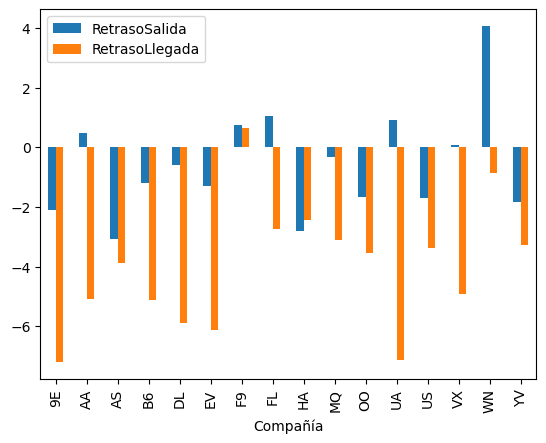

In [35]:
import matplotlib.pyplot as plt

#Para valores de compañias en particular agrupamos primero por compañia y luego la funcion correspondiente en las columnas
retrasos = planes.groupby("Compañía")[["RetrasoSalida","RetrasoLlegada"] ].mean()
print(retrasos)
retrasos.plot(kind = "bar")
plt.show()

AeropuertoOrigen
Albuquerque International Sunport                       157.0
Austin - Bergstrom International                        218.0
Baltimore/Washington International Thurgood Marshall    526.0
Bob Hope                                                 94.0
Bradley International                                    85.0
                                                        ...  
Theodore Francis Green State                             54.0
Tucson International                                     51.0
Washington Dulles International                         223.0
Will Rogers World                                        77.0
William P Hobby                                         344.0
Name: SalidaTarde, Length: 70, dtype: float64


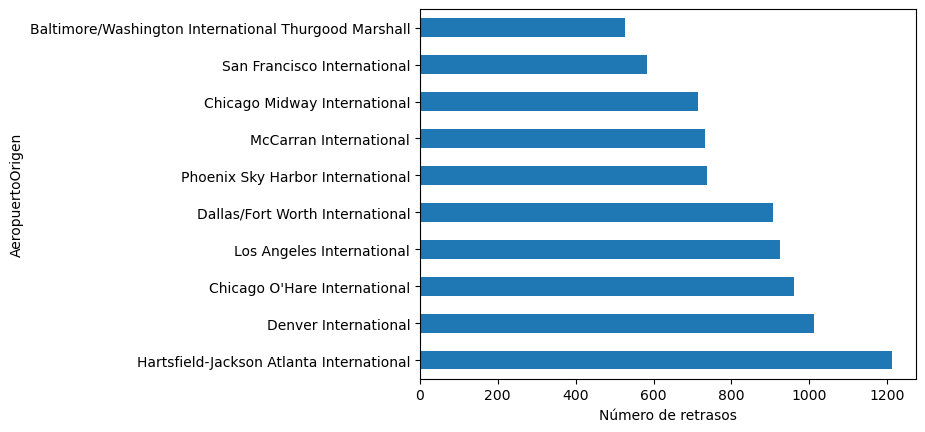

In [37]:
#Por último para el aeropuerto con más retrasos, una vez más agrupamos por aeropuerto y sumamos los retrasos de salida
masRetrasos = planes.groupby("AeropuertoOrigen")["SalidaTarde"].sum()
print(masRetrasos)
top10Retrasos = masRetrasos.sort_values(ascending=False)[:10]
top10Retrasos.plot(kind = "barh")
plt.xlabel("Número de retrasos")
plt.show()